In [2]:
# LT: Exclude DepDelay
# ST: Include DepDelay
# Classification: Predict if arrdelay > 0

# Import Necessary Package here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
import gc

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier

import matplotlib.pyplot as plt

# Data Import

In [3]:
# Load CSV 
df = pd.read_csv(r"C:\ORIE4741 Data\2016_to_2020_flight_feature_eng_w_DestState.csv")

In [4]:
df = df.drop('Unnamed: 0', axis = 1)
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DepDelay', 'ArrDelay', 'CRSElapsedTime',
       'Distance', 'Severe-Cold_Severity', 'Fog_Severity', 'Hail_Severity',
       ...
       'DestState_TN', 'DestState_TX', 'DestState_UT', 'DestState_VA',
       'DestState_VI', 'DestState_VT', 'DestState_WA', 'DestState_WI',
       'DestState_WV', 'DestState_WY'],
      dtype='object', length=112)

In [5]:
# Check all columns are in numeric form
df.dtypes[df.dtypes != 'int64'][df.dtypes != 'float64']

Series([], dtype: object)

In [6]:
# Check NA value 
df.isnull().values.any()

False

In [7]:
df['is_late'] = df['ArrDelay'] > 0
df = df.drop(columns = ['ArrDelay'])

In [8]:
# Inspect all columns
pd.set_option('display.max_columns', None)
df.head() 

,Year,Month,DayofMonth,DepDelay,CRSElapsedTime,Distance,Severe-Cold_Severity,Fog_Severity,Hail_Severity,Rain_Severity,Snow_Severity,Storm_Severity,Other Precipitation_Severity,CRSDep_afternoon,CRSDep_midnight,CRSDep_morning,CRSDep_night,CRSArr_afternoon,CRSArr_midnight,CRSArr_morning,CRSArr_night,Q1,Q2,Q3,Q4,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_DL,Airline_EV,Airline_F9,Airline_G4,Airline_HA,Airline_MQ,Airline_NK,Airline_OH,Airline_OO,Airline_UA,Airline_VX,Airline_WN,Airline_YV,Airline_YX,Origin_F9,Origin_HA,Origin_UA,Origin_AA,Origin_OO,Origin_VX,Origin_WN,Origin_B6,Origin_DL,Origin_AS,DestState_AK,DestState_AL,DestState_AR,DestState_AZ,DestState_CA,DestState_CO,DestState_CT,DestState_FL,DestState_GA,DestState_HI,DestState_IA,DestState_ID,DestState_IL,DestState_IN,DestState_KS,DestState_KY,DestState_LA,DestState_MA,DestState_MD,DestState_ME,DestState_MI,DestState_MN,DestState_MO,DestState_MS,DestState_MT,DestState_NC,DestState_ND,DestState_NE,DestState_NH,DestState_NJ,DestState_NM,DestState_NV,DestState_NY,DestState_OH,DestState_OK,DestState_OR,DestState_PA,DestState_PR,DestState_RI,DestState_SC,DestState_SD,DestState_TN,DestState_TX,DestState_UT,DestState_VA,DestState_VI,DestState_VT,DestState_WA,DestState_WI,DestState_WV,DestState_WY,is_late
0,2016,1,6,-3.0,158.0,986.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
1,2016,1,7,-4.0,158.0,986.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,2016,1,8,-5.0,158.0,986.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
3,2016,1,9,2.0,158.0,986.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,2016,1,10,100.0,158.0,986.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True


# Feature Selection
As discussed in porposal, we will have two models, one predicting delay before passengers arrive at the airport, and the other one predict delay using all data avaliable until the plane left the ground.

Here, some columns contain data that will only be avaliable when the passengers board the plane (like DepDelay and Weather). We cannot use them in our long-run forecase, but we can include them in our short-run forecast.

In [9]:
weather_columns = ['Severe-Cold', 'Fog', 'Hail', 'Rain', 'Snow', 'Storm', 'Other Precipitation']
ST_columns = ['DepDelay']  + weather_columns
df_LT = df[df.columns.difference(ST_columns)]
# df_ST = df

In [10]:
del [[df]]
gc.collect()

30

# Model Experimentation
## Logistic regression
As a start, we will fit a simple linear regression with y = is_late

In [11]:
model_balanced = 'balanced'
# model_balanced = None

num_worker = 8

In [12]:
# Specify X and y
X = df_LT.drop(columns = ['is_late'])
y = pd.DataFrame(df_LT['is_late'])

# X = df_ST.drop(columns = ['is_late'])
# y = pd.DataFrame(df_ST['is_late'])


# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
X.shape

(8988665, 110)

In [14]:
logistic = LogisticRegression(class_weight = model_balanced, n_jobs = num_worker)
logistic.fit(X_train, y_train.values.ravel())

LogisticRegression(class_weight='balanced', n_jobs=8)

In [15]:
# See Train 
pred = logistic.predict(X_train)
print(classification_report(y_train.values.ravel(), pred))

              precision    recall  f1-score   support

       False       0.83      0.90      0.87   4575380
        True       0.80      0.68      0.74   2615552

    accuracy                           0.82   7190932
   macro avg       0.82      0.79      0.80   7190932
weighted avg       0.82      0.82      0.82   7190932



In [16]:
# See Test 
pred = logistic.predict(X_test)
print(classification_report(y_test.values.ravel(), pred))

              precision    recall  f1-score   support

       False       0.83      0.90      0.87   1142605
        True       0.80      0.68      0.74    655128

    accuracy                           0.82   1797733
   macro avg       0.82      0.79      0.80   1797733
weighted avg       0.82      0.82      0.82   1797733



In [15]:
# See dummy majority classfier
pred = np.zeros(y_test.values.shape[0])
print(classification_report(y_test.values.ravel(), pred))

C:\Users\19665\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19665\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       False       0.64      1.00      0.78   1143905
        True       0.00      0.00      0.00    653828

    accuracy                           0.64   1797733
   macro avg       0.32      0.50      0.39   1797733
weighted avg       0.40      0.64      0.49   1797733



C:\Users\19665\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Simple Decision Tree

In [17]:
simple_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, class_weight=model_balanced)
simple_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5)

In [18]:
def plot_feature_importances(model, feature_names):
    n_features = len(feature_names)
    plt.figure(figsize=(10, 30))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.grid(True)

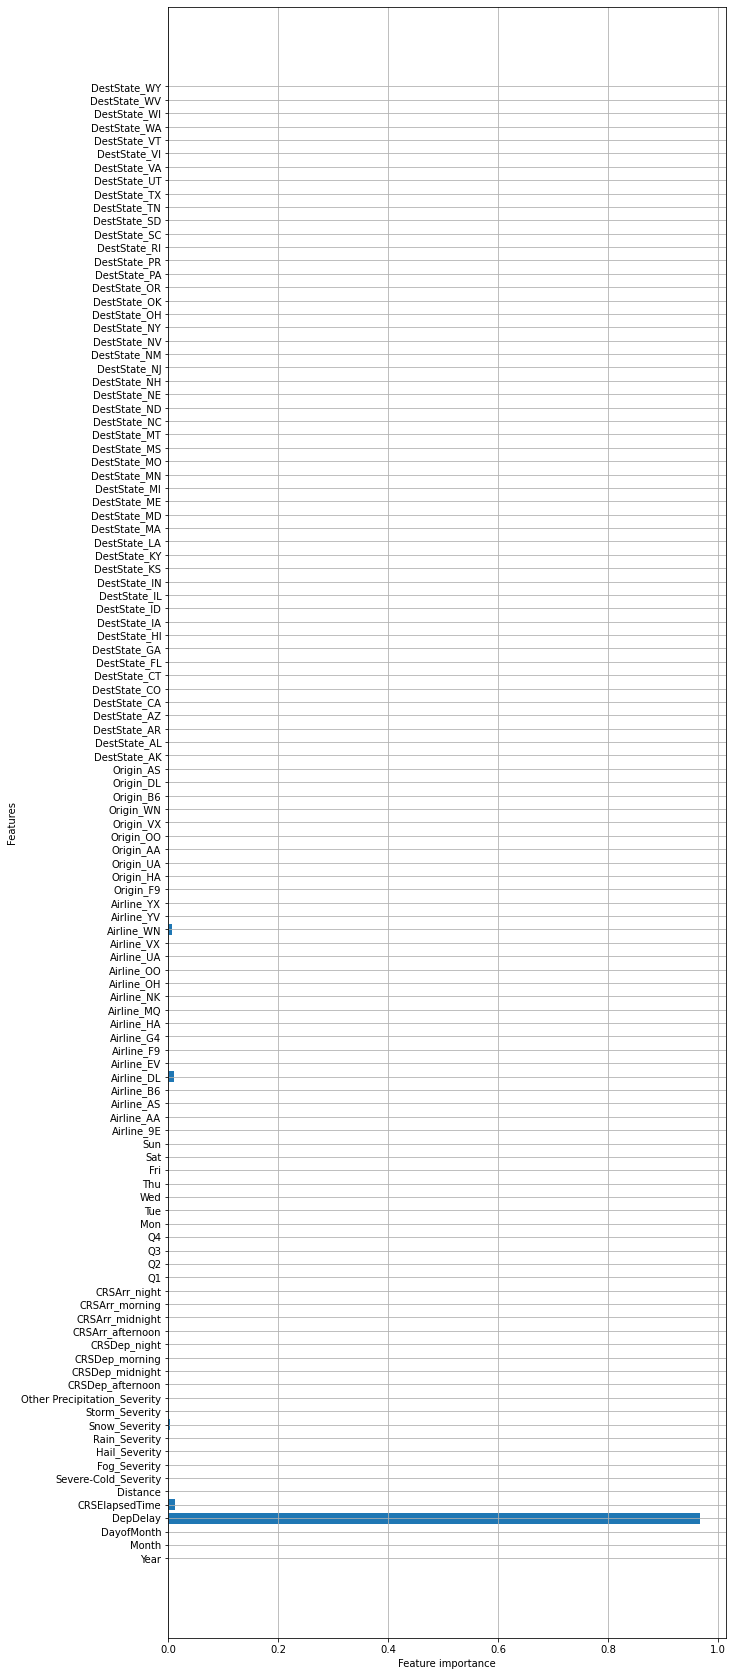

In [19]:
feature_names = X_train.columns.values
plot_feature_importances(simple_tree, feature_names)

In [20]:
# See Train 
pred = simple_tree.predict(X_train)

In [21]:
pd.crosstab(y_train.values.ravel(), pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,False,True,All
True,,,
False,4187308,388072,4575380
True,878541,1737011,2615552
All,5065849,2125083,7190932


In [22]:
print(classification_report(y_train.values.ravel(), pred))

              precision    recall  f1-score   support

       False       0.83      0.92      0.87   4575380
        True       0.82      0.66      0.73   2615552

    accuracy                           0.82   7190932
   macro avg       0.82      0.79      0.80   7190932
weighted avg       0.82      0.82      0.82   7190932



In [23]:
pred = simple_tree.predict(X_test)
pd.crosstab(y_test.values.ravel(), pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,False,True,All
True,,,
False,1045356,97249,1142605
True,220389,434739,655128
All,1265745,531988,1797733


In [24]:
print(classification_report(y_test.values.ravel(), pred))

              precision    recall  f1-score   support

       False       0.83      0.91      0.87   1142605
        True       0.82      0.66      0.73    655128

    accuracy                           0.82   1797733
   macro avg       0.82      0.79      0.80   1797733
weighted avg       0.82      0.82      0.82   1797733



## Random Forest

In [ ]:
forest = RandomForestClassifier(criterion='gini', n_estimators = 100, max_depth = 5, n_jobs = num_worker, verbose = 1, max_features = 'sqrt', max_samples = 0.8, class_weight=model_balanced)

In [ ]:
forest.fit(X_train, y_train.values.ravel())

In [ ]:
feature_names = X_train.columns.values
plot_feature_importances(forest, feature_names)

In [ ]:
# See Train 
pred = forest.predict(X_train)
print(classification_report(y_train.values.ravel(), pred))

In [ ]:
# See Test 
pred = forest.predict(X_test)
print(classification_report(y_test.values.ravel(), pred))

In [ ]:
pd.crosstab(y_test.values.ravel(), pred, rownames=['True'], colnames=['Predicted'], margins=True)